In [1]:
import numpy as np # 数组操作
import pandas as pd #文件操作
import datetime
import time

In [2]:
data = pd.read_excel('./input1.xlsx')  
data.head()  

,日期,星期,月份,四季,最高气温,最低气温,平均气温,温度等级,天气,转天气,...,空气质量指数,PM2.5,PM10,SO2,CO,NO2,O3_8h,程度,节假日,总供水量
0,2015-11-03,星期二,11,冬,21,13,17.0,舒适,多云,多云,...,119,90,106,21,1.4,84,112,轻度污染,上班,4363379
1,2015-11-04,星期三,11,冬,21,16,18.5,舒适,小雨,小雨,...,69,33,51,13,0.8,55,67,良,上班,4730486
2,2015-11-05,星期四,11,冬,24,18,21.0,舒适,多云,多云,...,73,41,66,18,0.8,58,64,良,上班,4488866
3,2015-11-06,星期五,11,冬,24,19,21.5,舒适,小雨,小雨,...,43,21,37,13,0.6,34,75,优,上班,4546968
4,2015-11-07,星期六,11,冬,25,16,20.5,舒适,雷阵雨,阵雨,...,65,47,52,16,1.1,39,48,良,周末,4344288


In [3]:
# check the shape of the DataFrame(rows, colums)  
data.shape  

(912, 22)

In [4]:
drop = ['PM2.5','PM10','SO2','CO','NO2','O3_8h']
data.drop(drop,axis=1, inplace=True) #将GIS关键字去掉

In [5]:
import seaborn as sns  
import matplotlib.pyplot as plt   
# visualize the relationship between the features and the response using scatterplots  
sns.pairplot(data, x_vars=['星期','月份','平均气温','温度等级','四季','最低气温','天气','风向','风力','空气质量指数','程度','节假日'], y_vars='总供水量', size=8, aspect=2 ) 
plt.show()#注意必须加上这一句，否则无法显示。  

<Figure size 19200x800 with 12 Axes>

In [6]:
y = data.pop('总供水量') #将y值取出
from sklearn.preprocessing import LabelEncoder # 转化为数字
data = pd.get_dummies(data)

In [7]:
data.head()

,日期,月份,最高气温,最低气温,平均气温,空气质量指数,星期_星期一,星期_星期三,星期_星期二,星期_星期五,...,程度_重度污染,节假日_上班,节假日_中秋,节假日_元旦,节假日_劳动,节假日_周末,节假日_国庆,节假日_春节,节假日_清明,节假日_端午
0,2015-11-03,11,21,13,17.0,119,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2015-11-04,11,21,16,18.5,69,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2015-11-05,11,24,18,21.0,73,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2015-11-06,11,24,19,21.5,43,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,2015-11-07,11,25,16,20.5,65,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
data.shape

(912, 73)

In [9]:
#create a python list of feature names  
feature_cols = ['最高气温','最低气温','平均气温','温度等级_舒适','温度等级_高温','温度等级_较高温','温度等级_较低温','温度等级_低温','空气质量指数','星期_星期一','星期_星期三','星期_星期二','星期_星期五','星期_星期六',
               '星期_星期日','月份','四季_春','四季_夏','四季_秋','四季_冬','天气_暴雨','天气_大雨','天气_多云','天气_雷阵雨','天气_晴','天气_特大暴雨','天气_小雪','天气_小雨','天气_阴',
                '天气_雨夹雪','天气_中雨','天气_阵雨','转天气_暴雨','转天气_大雨','转天气_雷阵雨','转天气_小雨','转天气_多云','转天气_晴','转天气_小雪',
               '转天气_阵雨','转天气_阴','转天气_中雨','转天气_雨夹雪','转天气_中雨','转天气_中雪','风向_东风','风向_南风','风向_北风','风向_西风',
                '风向_东南风','风向_东北风','风向_西南风','风向_西北风','风力_1-3级','风力_1-2级','风力_3-4级','风力_4-5级','风力_5-6级',
               '程度_优', '程度_良', '程度_轻度污染', '程度_重度污染', '程度_中度污染','节假日_上班','节假日_元旦','节假日_春节','节假日_清明'
         ,'节假日_劳动','节假日_端午','节假日_国庆','节假日_周末']  
# use the list to select a subset of the original DataFrame  
X = data[feature_cols]  
# equivalent command to do this in one line  
X = data[['最高气温','最低气温','平均气温','温度等级_舒适','温度等级_高温','温度等级_较高温','温度等级_较低温','温度等级_低温','空气质量指数','星期_星期一','星期_星期三','星期_星期二','星期_星期五','星期_星期六',
               '星期_星期日','月份','四季_春','四季_夏','四季_秋','四季_冬','天气_暴雨','天气_大雨','天气_多云','天气_雷阵雨','天气_晴','天气_特大暴雨','天气_小雪','天气_小雨','天气_阴',
                '天气_雨夹雪','天气_中雨','天气_阵雨','转天气_暴雨','转天气_大雨','转天气_雷阵雨','转天气_小雨','转天气_多云','转天气_晴','转天气_小雪',
               '转天气_阵雨','转天气_阴','转天气_中雨','转天气_雨夹雪','转天气_中雨','转天气_中雪','风向_东风','风向_南风','风向_北风','风向_西风',
                '风向_东南风','风向_东北风','风向_西南风','风向_西北风','风力_1-3级','风力_1-2级','风力_3-4级','风力_4-5级','风力_5-6级',
               '程度_优', '程度_良', '程度_轻度污染', '程度_重度污染', '程度_中度污染','节假日_上班','节假日_元旦','节假日_春节','节假日_清明'
         ,'节假日_劳动','节假日_端午','节假日_国庆','节假日_周末']]  
# print the first 10 rows  
print(X.head())
# check the type and shape of X  
print (type(X))  
print (X.shape)  

   最高气温  最低气温  平均气温  温度等级_舒适  温度等级_高温  温度等级_较高温  温度等级_较低温  温度等级_低温  空气质量指数  \
0    21    13  17.0        1        0         0         0        0     119   
1    21    16  18.5        1        0         0         0        0      69   
2    24    18  21.0        1        0         0         0        0      73   
3    24    19  21.5        1        0         0         0        0      43   
4    25    16  20.5        1        0         0         0        0      65   

   星期_星期一   ...    程度_重度污染  程度_中度污染  节假日_上班  节假日_元旦  节假日_春节  节假日_清明  节假日_劳动  \
0       0   ...          0        0       1       0       0       0       0   
1       0   ...          0        0       1       0       0       0       0   
2       0   ...          0        0       1       0       0       0       0   
3       0   ...          0        0       1       0       0       0       0   
4       0   ...          0        0       0       0       0       0       0   

   节假日_端午  节假日_国庆  节假日_周末  
0       0       0       0  


In [10]:
from sklearn.cross_validation import train_test_split  #这里是引用了交叉验证  
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)  

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
print (X_train.shape)  
print (y_train.shape)
print(X_test.shape  )
print (y_test.shape )

(820, 71)
(820,)
(92, 71)
(92,)


In [12]:
print(y_test.head)

<bound method NDFrame.head of 252    4670102
694    4436869
144    4412078
747    4278936
145    4442451
372    4270689
55     4276108
908    4107598
97     3677722
14     4299903
652    4562302
497    4277014
568    4138510
196    4392865
721    4345213
204    4568580
548    4067754
181    4228250
655    4614450
706    4452281
801    4294178
31     4202790
270    4865027
103    3964593
285    4795858
745    4163870
150    4376338
399    4286970
320    4523283
240    4742567
        ...   
338    4115007
533    4367965
580    4105498
434    4265087
713    4100621
60     4203537
654    4569031
239    4371388
391    4406934
728    4302003
531    4261750
871    4272528
158    4500011
214    4254374
535    4275495
703    3961405
634    4731838
8      4584433
746    4198193
646    4634886
881    4217217
255    4716658
271    4810335
733    4233912
557    4349583
790    4189809
844    3729013
337    4060647
34     4329784
363    4255463
Name: 总供水量, Length: 92, dtype: int64>


In [13]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
print (model ) 
print (linreg.intercept_ ) 
print (linreg.coef_  )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
3586864.2533185123
[  13498.25545853    -980.1321372     6259.06166067 -134001.75860043
   78033.60941806    8693.16093073  -74245.41821916  121520.4064708
    1185.23757081   27006.46916229   -4304.51831316   19969.28650738
   17762.44749719  -46455.54683434  -55329.79223847   -5254.36259236
  -39610.36896497  -68994.5071923    41130.08377333   67474.79238394
  -89672.85560531   43731.26549371   36055.07391372  -23462.68712612
    8480.60752338 -179979.5022837   -61093.51907502   15304.45722385
   21474.99020924  344201.47888106  -41382.53253326  -73656.77662154
   72693.53864659   70995.24801005   80538.46261074   36898.22179495
   46515.29926501   62515.36779596 -402755.64112242    9913.08568463
   54881.27911865   -4992.7541805    33891.41145134   -4992.7541805
  -61093.51907502   -4564.28359178  -15550.52940392    2797.5548917
   13736.78904782   20564.64165969   12227.51298709   -9704.23742022
  -19507.4

In [14]:
# pair the feature names with the coefficients  
zip(feature_cols, linreg.coef_)  

In [15]:
y_pred = linreg.predict(X_test)  
print (y_pred) 
print (type(y_pred)  )

[4631932.07454575 4587692.84381862 4282468.0586545  4101554.74350131
 4318318.10603595 4223938.49956654 4360395.12601206 4020515.40934542
 3538351.9769229  4283584.45081356 4635697.483787   4183758.49028086
 4170114.22584478 4389393.54642836 4295124.95179188 4436246.86223296
 4134348.46015843 3921505.18201929 4671592.93391402 4630376.66661304
 4237851.89907472 4213972.33909149 4646608.93679922 4187033.00155482
 4734529.33322119 4191282.33786742 4348551.13209793 4311827.87979952
 4278014.4683771  4552849.96719122 4463356.17610867 4124772.96189676
 4135412.70033966 4221083.94324399 4212197.41983104 4314092.33108994
 4371353.44060048 4193697.96216046 4613495.28112033 4177885.00668034
 4341778.91476451 4223969.87589043 4263405.48005287 4441786.41593132
 4087832.72385367 3952900.77991249 4473388.94269027 4402460.49923158
 4300030.89999339 4576359.18638968 4200596.50959301 4137276.56746567
 4121691.56468072 3966641.6026549  4779135.779313   4178285.64445682
 4664576.1080453  4246836.628969  

In [16]:
print (type(y_pred),type(y_test)  )
print (len(y_pred),len(y_test) ) 
print (y_pred.shape,y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(y_pred[i]-y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print( "RMSE by hand:",sum_erro  )

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
92 92
(92,) (92,)
RMSE by hand: 184487.8063662318


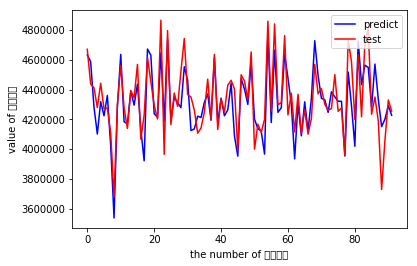

In [17]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_test)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of 总供水量")  
plt.ylabel('value of 总供水量') 
plt.savefig('供水量预测6.png', dpi=1500)
plt.show()  

In [20]:
dict = {}
for i in range(91):
    dict[np.array(y_test)[i]] = y_pred[i]

In [24]:
from sklearn.metrics import explained_variance_score #越小代表结果越差
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test,y_pred))
print('explained_variance_score:',explained_variance_score(y_test,y_pred))

r2_score: 0.6581427352849976
explained_variance_score: 0.6678228780693981


In [25]:
model.score(X_train,y_train)

0.6521128512637315

dic_in = {'星期':input('星期:'),'最高温度':input('最高温度:'),'最低温度':input('最低温度:'), '天气':input('天气:'),
'转天气':input('转天气:'), '风向':input('风向:'), '风力':input('风力:'), '空气质量指数':input('空气质量指数:'),
'程度':input('程度:'),'节假日':input('节假日:')} #输入数据,保存到字典dic_in里面

In [ ]:
def predict(dic_in):
    dic = dict.fromkeys(dic_in,0)
    for key in dic_in.keys():
        if key in dic_in.keys():
            dic_in[key] = dic_in[key]
        else:
            dic[str(key + '_' + dic_input[key])] = 1
        pre_array = np.array(list(dic_in.values())).reshape((1,len(dic_in )))
    return classfier.predict_proba(pre_array)[0]
#定义函数，用于对输入的数据分裂

In [ ]:
print(predict(dic_in)[1])